# **Amazon Book Dataset Analysis and Recommender System**
Analyzed a dataset of approximately 77,000 Amazon book entries to identify trends across key features such as pricing, star ratings, and customer reviews. Conducted exploratory data analysis to uncover patterns influencing book popularity and customer satisfaction. Additionally, developed a basic recommender system to suggest books based on user preferences and historical data, leveraging collaborative filtering and content-based techniques.

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report # Import classification_report
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
import statsmodels.api as sm


#Load Dataset

In [ ]:
book = pd.read_csv('/content/kindle_data-v2.csv')
book.head(2)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships


# Information about Data

In [ ]:
print(book.shape)

info_result = book.info()
print(info_result)
print(book.isnull().sum())


(133102, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  ob

#Removing NAs

In [ ]:
book = book.dropna(subset=['publishedDate', "soldBy"])
book.isnull().sum()

,0
asin,0
title,0
author,0
soldBy,0
imgUrl,0
productURL,0
stars,0
reviews,0
price,0
isKindleUnlimited,0


# rename columns

In [ ]:
book = book.rename(columns={'publishedDate': 'year',
                            "category_name":"category"})

#Drop Columns

In [ ]:
book = book.drop(columns=["asin", "category_id"])
book.columns
book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77800 entries, 0 to 133101
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              77800 non-null  object 
 1   author             77800 non-null  object 
 2   soldBy             77800 non-null  object 
 3   imgUrl             77800 non-null  object 
 4   productURL         77800 non-null  object 
 5   stars              77800 non-null  float64
 6   reviews            77800 non-null  int64  
 7   price              77800 non-null  float64
 8   isKindleUnlimited  77800 non-null  bool   
 9   isBestSeller       77800 non-null  bool   
 10  isEditorsPick      77800 non-null  bool   
 11  isGoodReadsChoice  77800 non-null  bool   
 12  year               77800 non-null  object 
 13  category           77800 non-null  object 
dtypes: bool(4), float64(2), int64(1), object(7)
memory usage: 6.8+ MB


#conver Year to Date format

In [ ]:
book['year'] = pd.to_datetime(book['year'])
book["year"] = book["year"].dt.year
book.head(2)
book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77800 entries, 0 to 133101
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              77800 non-null  object 
 1   author             77800 non-null  object 
 2   soldBy             77800 non-null  object 
 3   imgUrl             77800 non-null  object 
 4   productURL         77800 non-null  object 
 5   stars              77800 non-null  float64
 6   reviews            77800 non-null  int64  
 7   price              77800 non-null  float64
 8   isKindleUnlimited  77800 non-null  bool   
 9   isBestSeller       77800 non-null  bool   
 10  isEditorsPick      77800 non-null  bool   
 11  isGoodReadsChoice  77800 non-null  bool   
 12  year               77800 non-null  int32  
 13  category           77800 non-null  object 
dtypes: bool(4), float64(2), int32(1), int64(1), object(6)
memory usage: 6.5+ MB


# Exploratory Data Analysis

## **title**

**Top 15 Titles: Distribution**

In [ ]:
top_15_titles = book['title'].value_counts().head(15)
print(top_15_titles)

title
Organic Chemistry                                  7
Macroeconomics                                     6
Criminal Evidence                                  5
Social Psychology                                  5
College Algebra                                    5
Psychology                                         4
Chemistry                                          4
Introduction to Law                                4
Meditations                                        4
Abnormal Psychology                                4
Criminal Law                                       3
Confessions                                        3
Criminal Investigation                             3
Federal Income Taxation (Aspen Casebook Series)    3
The Island                                         3
Name: count, dtype: int64


<ipython-input-21-2f649396ed93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_titles.values, y=top_15_titles.index, palette="deep")


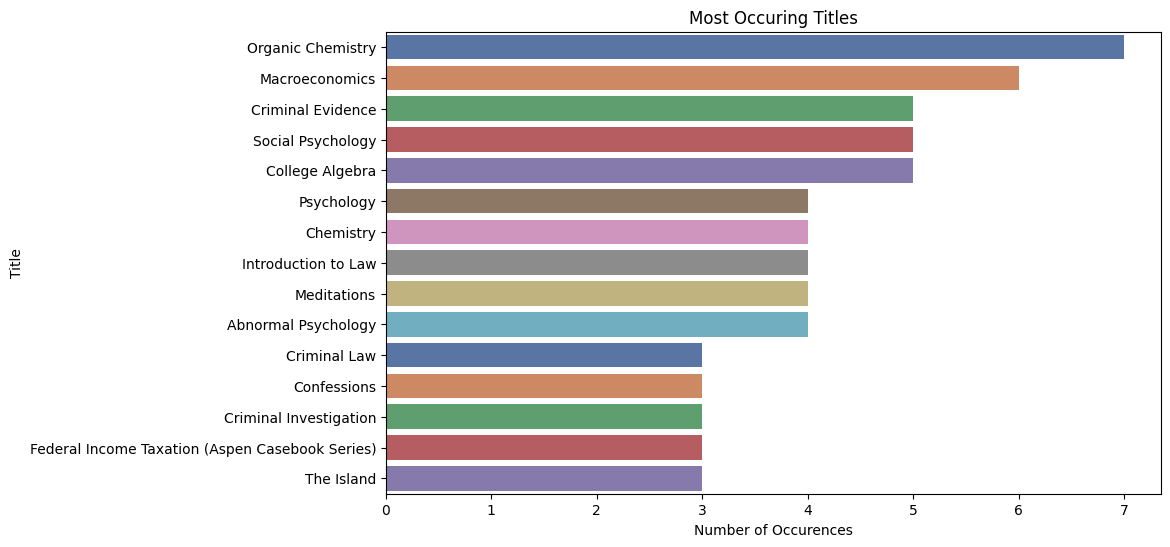

In [ ]:
#top 50 titles that reoccured
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_titles.values, y=top_15_titles.index, palette="deep")
plt.ylabel('Title')
plt.xlabel('Number of Occurences')
plt.title("Most Occuring Titles")
plt.show()

**Top 30 Books Based on Reviews**

In [ ]:
top_reviews = book.sort_values(by='reviews', ascending=False).head(30).set_index("title")
print(top_reviews)

                                                                 author  \
title                                                                     
Where the Crawdads Sing                                     Delia Owens   
The Nightingale: A Novel                                 Kristin Hannah   
Reminders of Him: A Novel                                Colleen Hoover   
The Midnight Library: A Novel                                 Matt Haig   
Eleanor Oliphant Is Completely Fine: A Novel              Gail Honeyman   
Beneath a Scarlet Sky: A Novel                            Mark Sullivan   
Lessons in Chemistry: A Novel                             Bonnie Garmus   
All the Light We Cannot See: A Novel                      Anthony Doerr   
Educated: A Memoir                                        Tara Westover   
The Seven Husbands of Evelyn Hugo: A Novel          Taylor Jenkins Reid   
Becoming                                                 Michelle Obama   
A Man Called Ove: A Novel

<ipython-input-23-5891c3f68feb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_reviews.index, x=top_reviews['reviews'], palette="rocket")


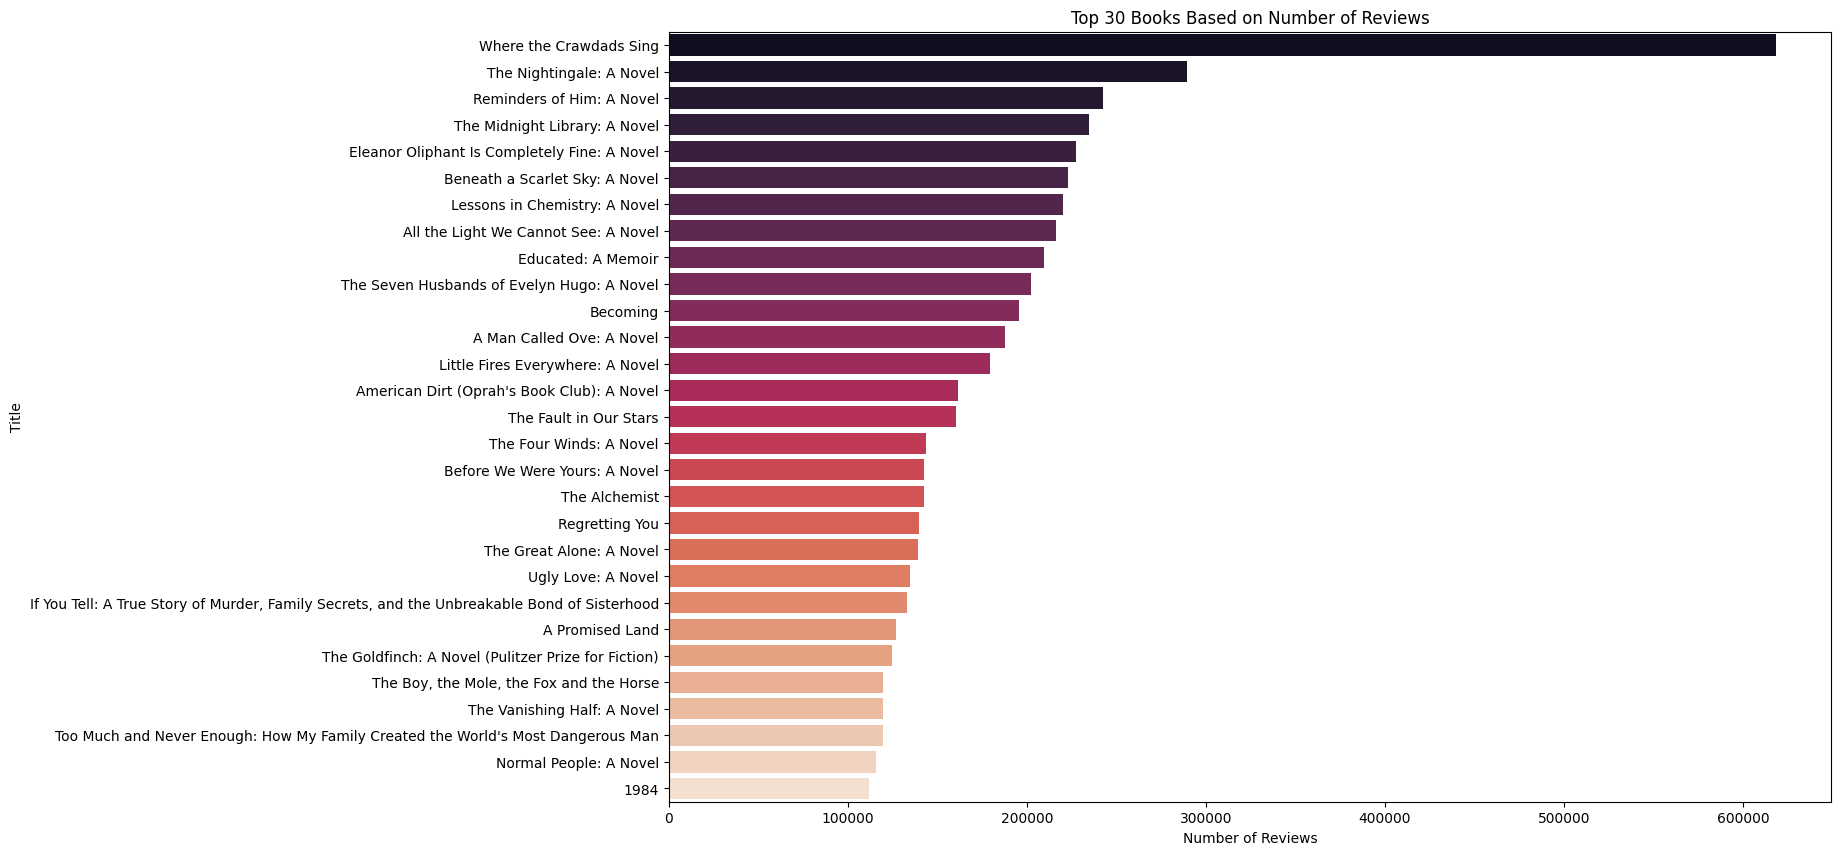

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(y=top_reviews.index, x=top_reviews['reviews'], palette="rocket")
plt.ylabel('Title')
plt.xlabel('Number of Reviews')
plt.title("Top 30 Books Based on Number of Reviews")
plt.show()

**Top 30 Books Based on Star rating**

In [ ]:
top_star_book = book.sort_values(by='stars', ascending=False).head(30).set_index("title")
print(top_star_book)

                                                                          author  \
title                                                                              
Women of Their Times                                               Anna Galstuck   
McDonald and Avery's Dentistry for the Child an...               Jeffrey A. Dean   
System Sustainment: Acquisition and Engineering...                Peter Sandborn   
Gas Turbine Combined Cycle Power Plants                             S. Can Gülen   
Wave Theory of Information                                 Massimo Franceschetti   
Amateur Radio General Class Licensing: For 2023...                 Stephen Horan   
Scientific Foundations of Engineering                           Stephen McKnight   
Minerals, Metals and Sustainability: Meeting Fu...                     WJ Rankin   
Synchronizing 5G Mobile Networks                                  Dennis Hagarty   
Knife's Edge: South Pacific Carrier Battles fro...               Robert C. S

<ipython-input-25-7aa5c11f8d26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_star_book.index, x=top_star_book['stars'], palette="rocket")


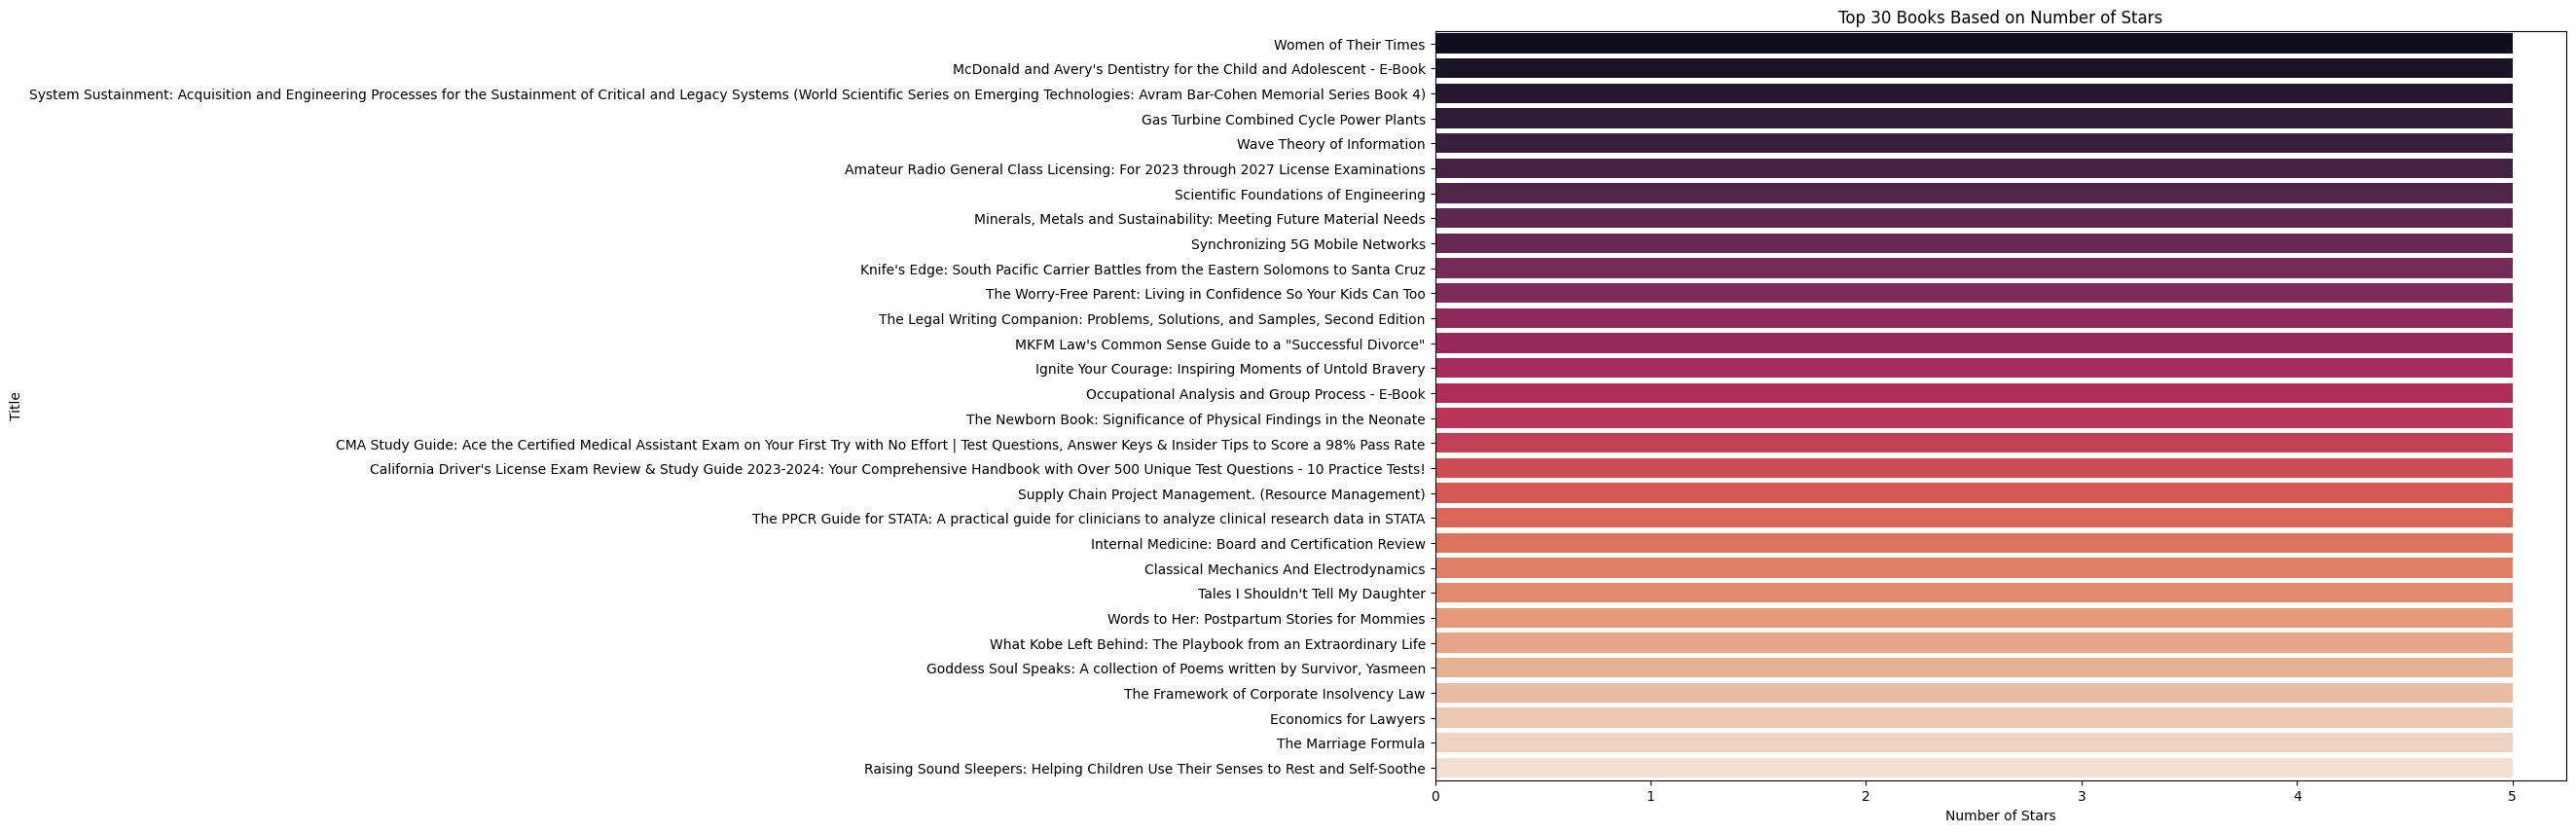

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(y=top_star_book.index, x=top_star_book['stars'], palette="rocket")
plt.ylabel('Title')
plt.xlabel('Number of Stars')
plt.title("Top 30 Books Based on Number of Stars")
plt.show()

# categories

**Category Count**

In [ ]:
top_15_cate = book['category'].value_counts()
print(top_15_cate)

category
Science & Math                  5047
Engineering & Transportation    4860
Biographies & Memoirs           4796
Parenting & Relationships       4441
Cookbooks, Food & Wine          4438
Computers & Technology          4412
Crafts, Hobbies & Home          4278
Travel                          4028
Law                             3991
Education & Teaching            3877
Arts & Photo graphy             3699
Politics & Social Sciences      3529
Self-Help                       2996
Religion & Spirituality         2812
Sports & Outdoors               2460
Reference                       2356
Business & Money                2284
Medical                         2215
Humor & Entertainment           1771
Mystery, Thriller & Suspense    1425
History                         1415
Literature & Fiction            1399
LGBTQ+ eBooks                   1342
Health, Fitness & Dieting       1313
Teen & Young Adult              1100
Nonfiction                       713
Science Fiction & Fantasy    

<ipython-input-27-27dc51ea77ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_cate.values, y=top_15_cate.index, palette="Set2")


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

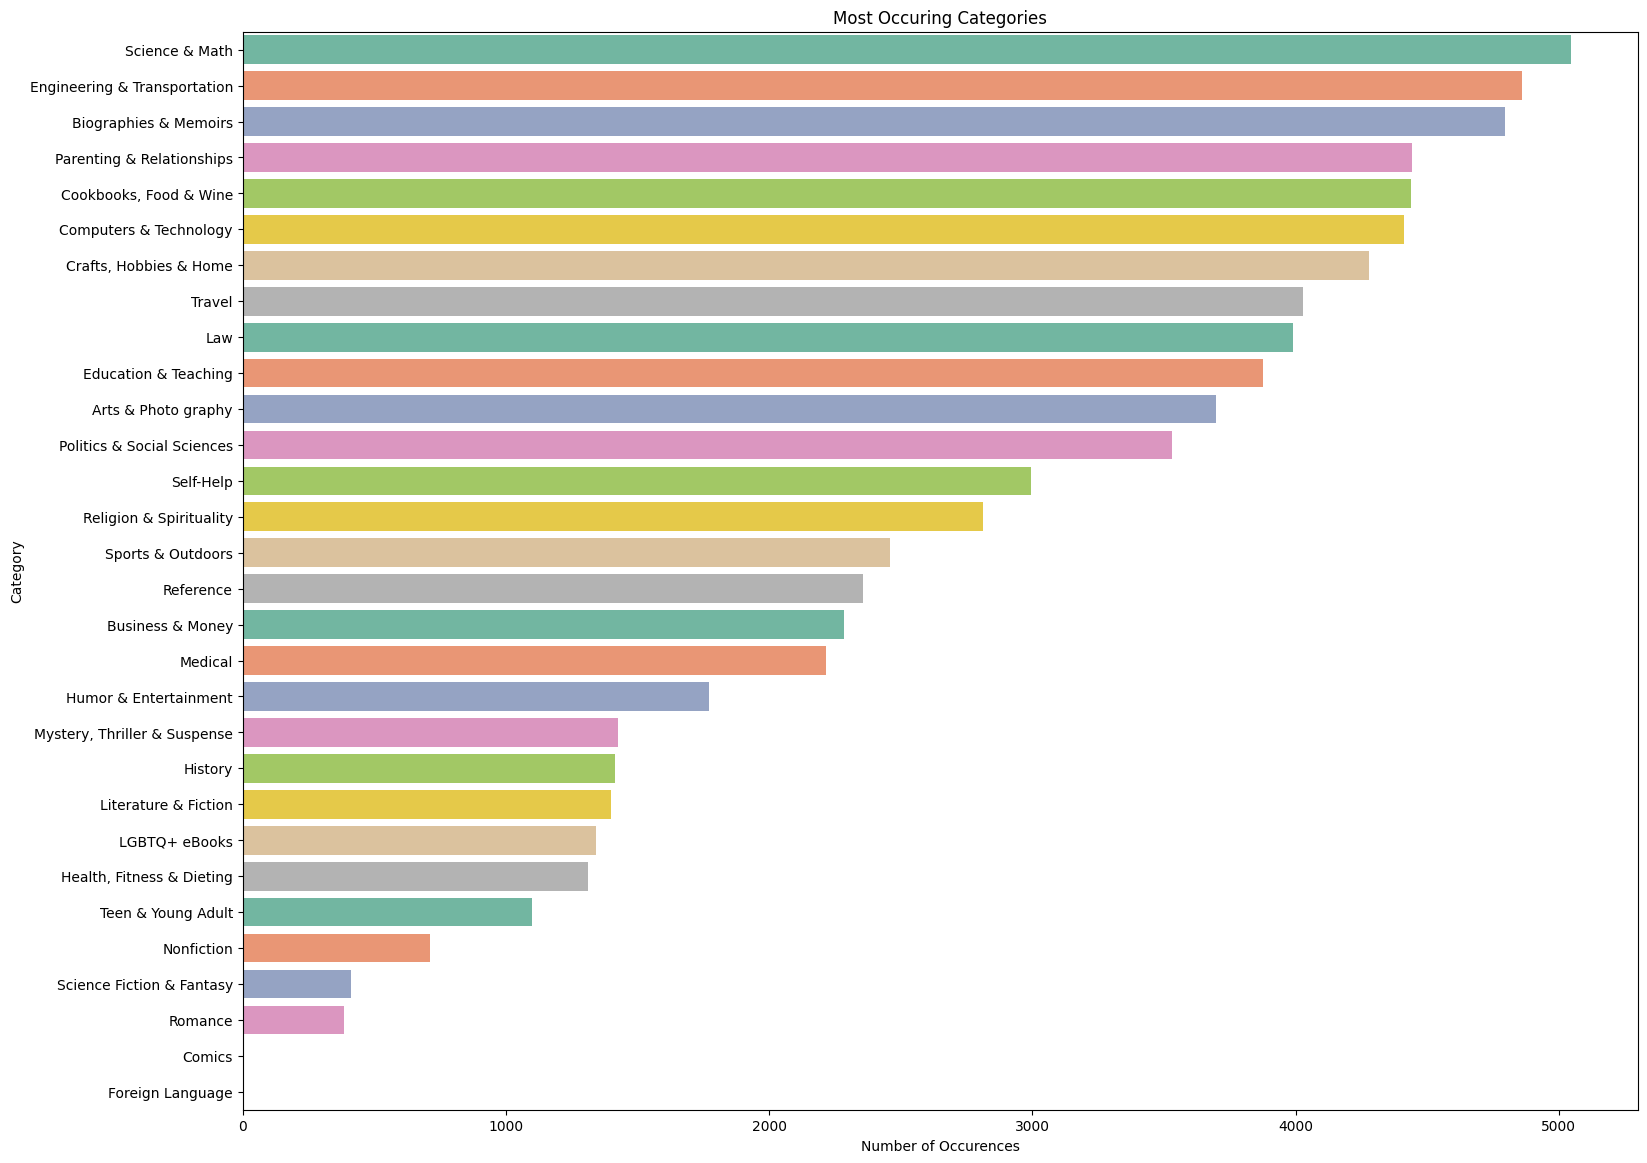

In [ ]:
plt.figure(figsize=(18, 14))
sns.barplot(x=top_15_cate.values, y=top_15_cate.index, palette="Set2")
plt.ylabel('Category')
plt.xlabel('Number of Occurences')
plt.title("Most Occuring Categories")
plt

**Top Categories Based on their Average Book Price**

In [ ]:
avg_price_cate = book.groupby('category')['price'].mean().sort_values(ascending=False)
print(avg_price_cate)

category
Law                             45.893999
Medical                         41.148194
Science & Math                  33.994228
Engineering & Transportation    29.191568
Education & Teaching            26.586477
Business & Money                26.002084
Computers & Technology          25.258624
Health, Fitness & Dieting       19.980030
Reference                       19.513353
Politics & Social Sciences      19.085738
Arts & Photo graphy             16.375372
Nonfiction                      14.665610
History                         13.929102
Sports & Outdoors               13.052967
Crafts, Hobbies & Home          12.328841
Religion & Spirituality         11.621963
Biographies & Memoirs           11.498884
Parenting & Relationships       11.142718
Cookbooks, Food & Wine          10.945699
Humor & Entertainment           10.706307
Self-Help                       10.535330
Travel                          10.492354
Literature & Fiction             9.225175
Teen & Young Adult       

<ipython-input-29-b43254526c6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_cate.values, y=avg_price_cate.index, palette="rocket")


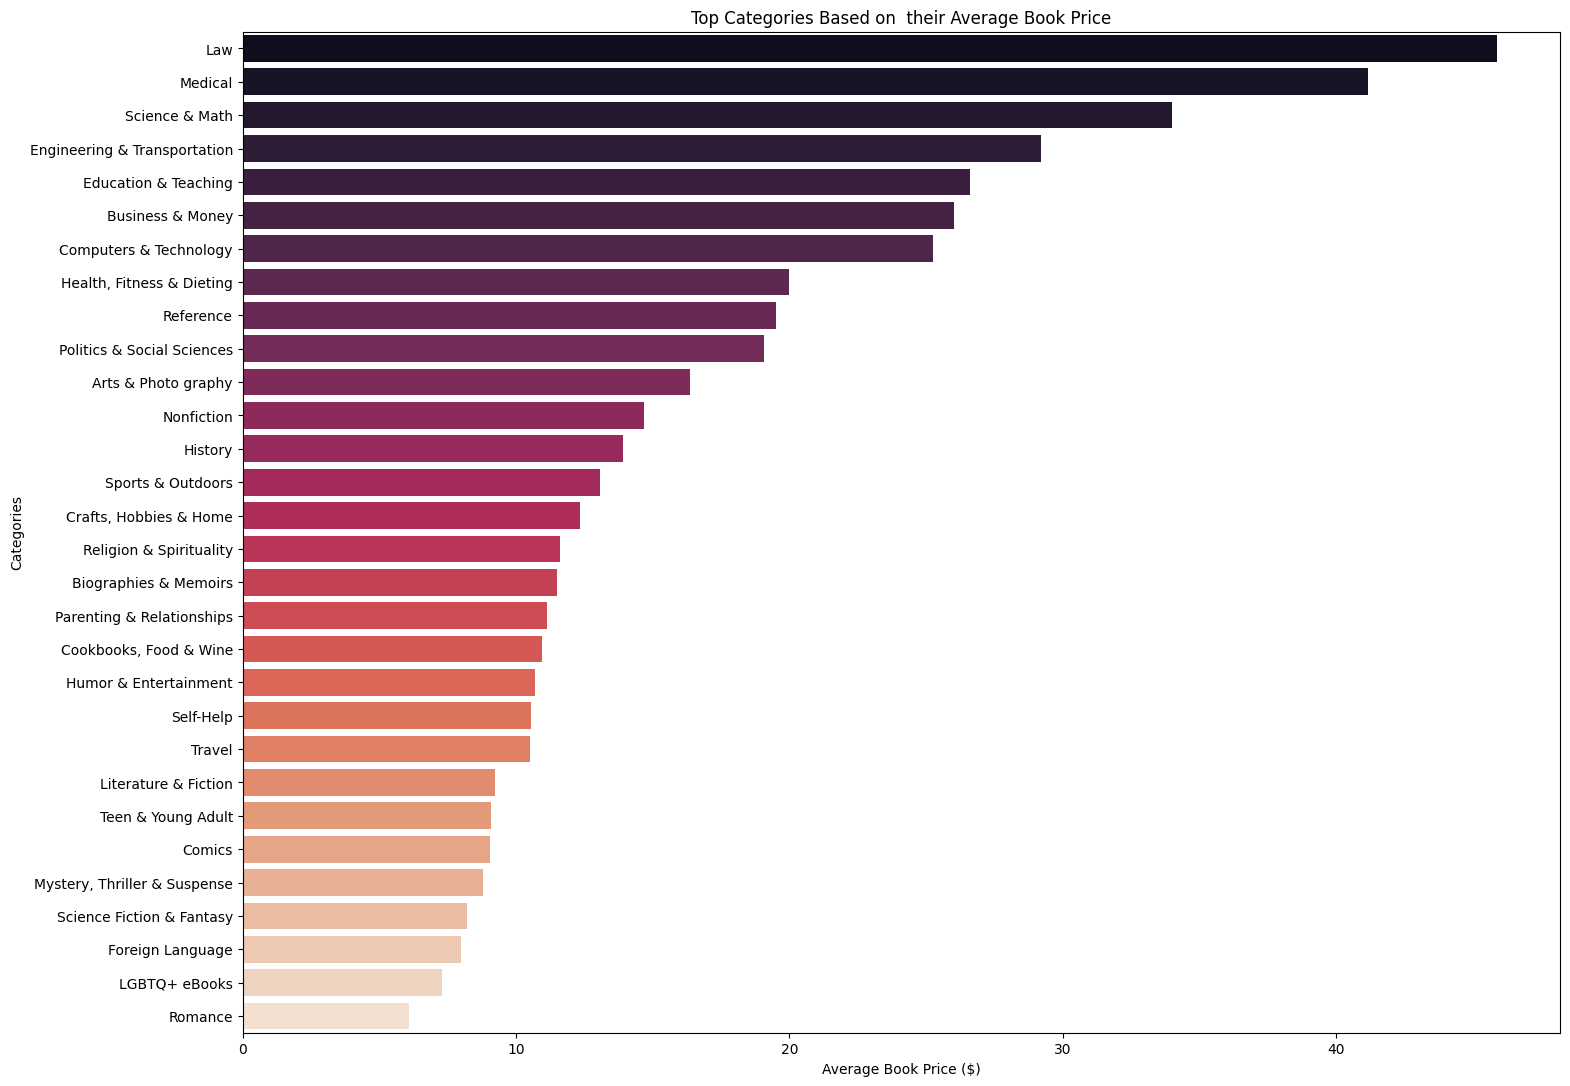

In [ ]:
plt.figure(figsize=(17, 13))
sns.barplot(x=avg_price_cate.values, y=avg_price_cate.index, palette="rocket")
plt.title("Top Categories Based on  their Average Book Price")
plt.ylabel('Categories')
plt.xlabel('Average Book Price ($)')
plt.show()


# authors

**Top 30 Authors**

In [ ]:
top_15_auth = book['author'].value_counts().head(30)
print(top_15_auth)

author
DK Eyewitness              154
Fodor's Travel Guides      111
DK                          96
America's Test Kitchen      73
Amazon.com Services LLC     68
Rough Guides                67
Stephen King                56
Nora Roberts                49
Rick Steves                 43
Max Lucado                  38
Cathy Glass                 33
Joyce Meyer                 31
John Grisham                28
SparkNotes                  28
Taste of Home               27
Stephen Mettling            27
James Patterson             27
Thich Nhat Hanh             26
Mometrix                    26
Thomas Nelson               26
Danielle Steel              26
Kaplan Test Prep            24
Meghan Quinn                24
John C. Maxwell             24
Lingo Mastery               24
M. William Phelps           23
Mark Twain                  23
The Princeton Review        23
Sandra Brown                23
Culture Smart!              23
Name: count, dtype: int64


<ipython-input-31-15468d182056>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_auth.values, y=top_15_auth.index, palette="dark")


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

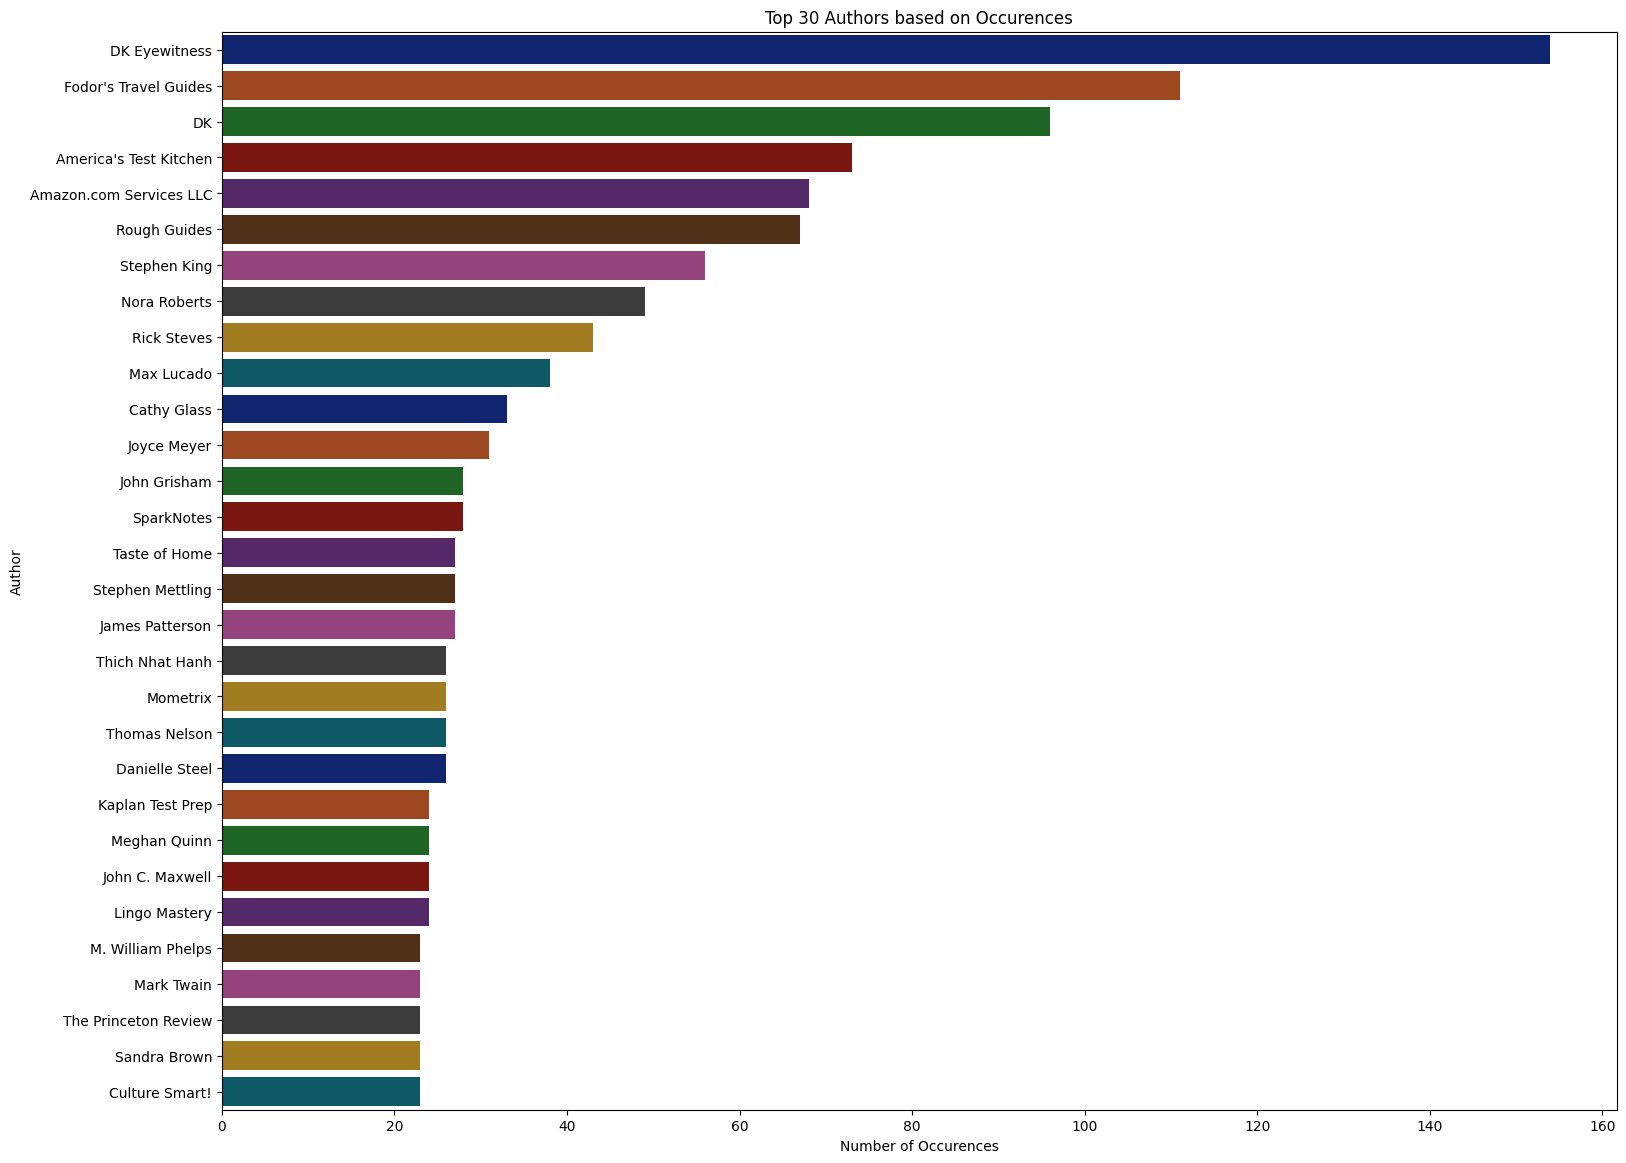

In [ ]:
plt.figure(figsize=(18, 14))
sns.barplot(x=top_15_auth.values, y=top_15_auth.index, palette="dark")
plt.ylabel('Author')
plt.xlabel('Number of Occurences')
plt.title("Top 30 Authors based on Occurences")
plt

**Top 30 Authors based on their Average Price**

In [ ]:
avg_price_by_author = book.groupby('author')['price'].mean().sort_values(ascending=False).head(30)
print(avg_price_by_author)

author
Clifford E. Kirsch         662.00
Jeffrey G. Sheldon         629.00
Foad Nahai                 543.99
Phillip N. Blondeel        481.49
Ervin A. Gonzalez          465.99
Stephanie R. Breslow       462.00
Rhonda E. Kay              443.00
SriniVas R. Sadda          436.79
Angus O. McKinnon          423.00
Henry Latimer              402.49
Ralph E. Lerner            399.00
Markus W. Buchler          396.00
Virginia A. McArthur       376.00
Luke A. Fedlam             368.00
Mary Hawn                  359.99
Larry Pozner               355.00
Mick J. Sanders            347.65
Christopher Kuner          337.09
Byron F. Egan              336.99
Andrew Haskell             335.99
Christoph Brunner          332.50
William R. Jarnagin        327.99
Robert J. Rhee             322.00
Geoffrey S. Corn           322.00
Jr. Henderson, James A.    322.00
Timothy P. Glynn           322.00
Robert Gomulkiewicz        322.00
Joost H.B. Pauwelyn        322.00
David P. Leonard           322.00
Derek B

<ipython-input-33-0d451abcf830>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_author.values, y=avg_price_by_author.index, palette="rocket")


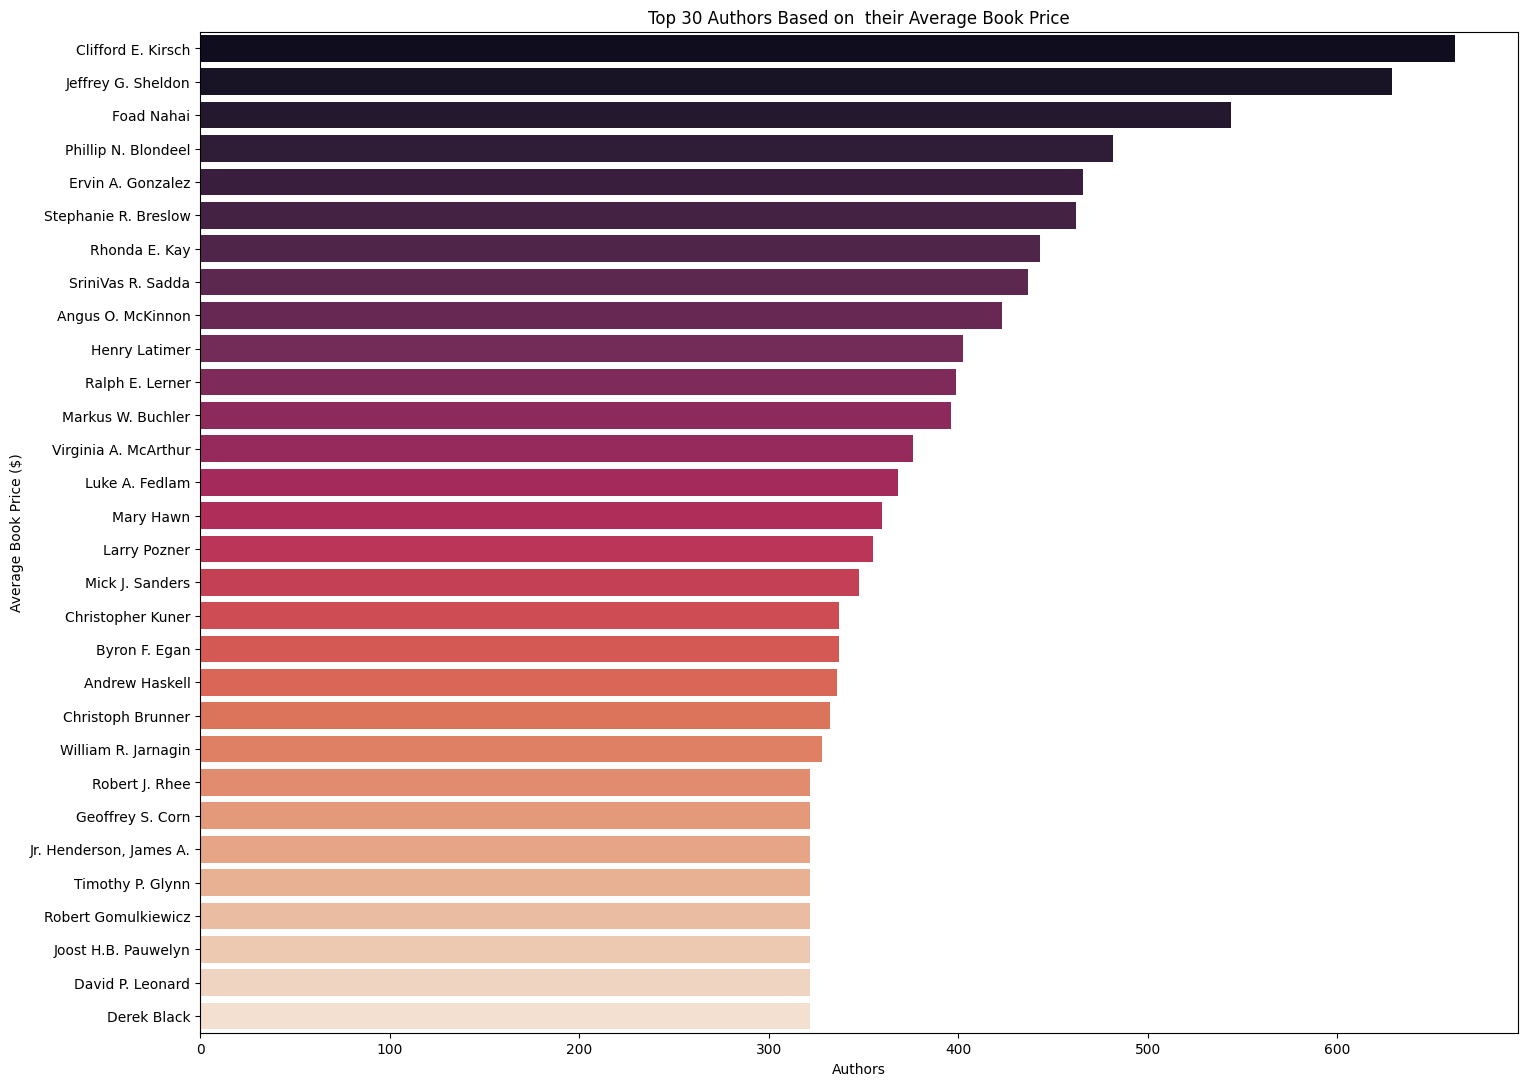

In [ ]:
plt.figure(figsize=(17, 13))
sns.barplot(x=avg_price_by_author.values, y=avg_price_by_author.index, palette="rocket")
plt.title("Top 30 Authors Based on  their Average Book Price")
plt.xlabel('Authors')
plt.ylabel('Average Book Price ($)')
plt.show()

**Top Authors based on Star Rating from 4.0**

In [ ]:
top_stars = book[book['stars']>=4.0]
top_stars = top_stars.groupby('author')['stars'].count().reset_index().sort_values('stars', ascending = False).head(30).set_index('author')
print(top_stars)

                         stars
author                        
DK Eyewitness              140
Fodor's Travel Guides      102
DK                          94
America's Test Kitchen      71
Amazon.com Services LLC     63
Rough Guides                58
Stephen King                56
Nora Roberts                49
Rick Steves                 41
Max Lucado                  38
Cathy Glass                 33
Joyce Meyer                 31
SparkNotes                  28
John Grisham                27
Thich Nhat Hanh             26
Stephen Mettling            26
Thomas Nelson               26
Danielle Steel              26
James Patterson             26
Taste of Home               25
John C. Maxwell             24
Lingo Mastery               24
Meghan Quinn                24
Mark Twain                  23
Culture Smart!              23
Sandra Brown                23
Mometrix                    23
Brian Tracy                 23
Wayne W. Dyer               22
Dean Koontz                 22


<ipython-input-35-e488e050902b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_stars.index, x=top_stars['stars'], palette="Set2")


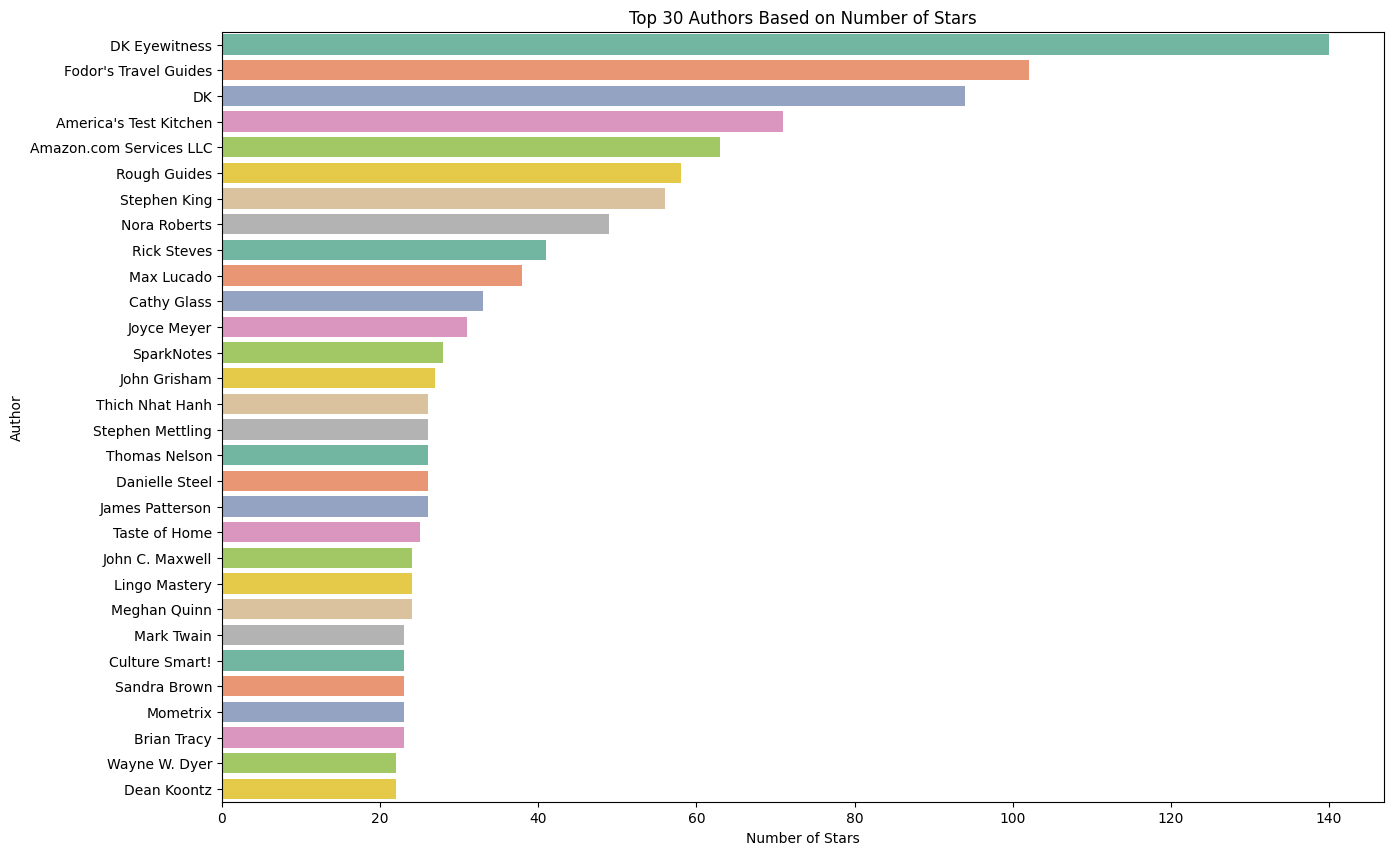

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(y=top_stars.index, x=top_stars['stars'], palette="Set2")
plt.ylabel('Author')
plt.xlabel('Number of Stars')
plt.title("Top 30 Authors Based on Number of Stars")
plt.show()

**Top Authors Based on Whether it was a best seller or editor pick**

In [ ]:
best_sell = book[book['isBestSeller'] == True]
editorpics = book[book['isEditorsPick'] == True]

Best Seller

In [ ]:
book_best = best_sell.groupby('author')['title'].count().sort_values(ascending=False).head(30)
print(book_best)

author
DK                     6
Freida McFadden        6
Marcus Aurelius        5
C.W. Farnsworth        5
Lonely Planet          4
Mindy Pelz             3
Shari Low              3
Hassan Osman           3
Homer                  3
Explore ToWin          3
NEDU                   3
Alex Epstein           2
Alexander Hamilton     2
Walter Grant           2
Various                2
SparkNotes             2
Sun Tzu                2
Thomas Nelson          2
Owen Janssen           2
Paul Schatzkin         2
Richard Dawkins        2
Shantel Tessier        2
Skip The Subtitles     2
National Geographic    2
Neil deGrasse Tyson    2
Alexis Averbuck        2
Michael Lewis          2
Michael Cao            2
Meghan Quinn           2
Marc Di Duca           2
Name: title, dtype: int64


<ipython-input-38-8e26956a0dda>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=book_best.index, y=book_best.values, palette="Set2")


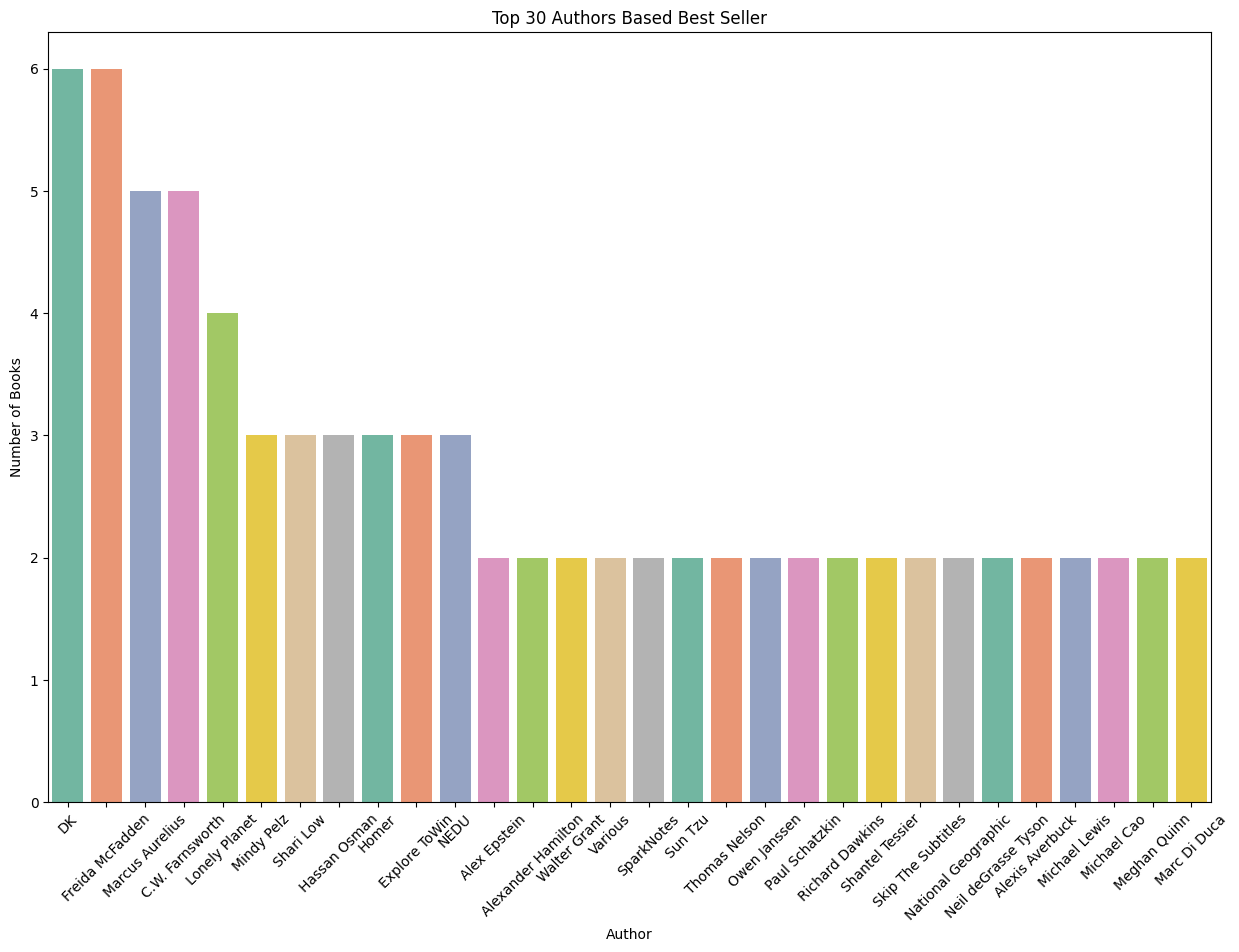

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x=book_best.index, y=book_best.values, palette="Set2")
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title("Top 30 Authors Based Best Seller")
plt.xticks(rotation=45)
plt.show()

Editor's Pick

In [ ]:
author_editor = editorpics.groupby('author')['title'].count().sort_values(ascending=False).head(30)
print(author_editor)

author
America's Test Kitchen    15
Stephen King              11
Nora Roberts               9
Christina Lauren           8
Harlan Coben               8
Ruth Ware                  7
Yotam Ottolenghi           7
John Grisham               7
H. W. Brands               7
Jennifer Weiner            6
Riley Sager                6
Colson Whitehead           6
Christopher Kimball        6
Ann Patchett               6
Danielle Walker            5
David McCullough           5
James Patterson            5
Joe Hill                   5
Ben Macintyre              5
Oliver Sacks               5
Mary Kubica                5
Jon Meacham                5
Jodi Picoult               5
Mark Bittman               5
Colleen Hoover             5
Walter Isaacson            5
Dan Jones                  5
Carlo Rovelli              4
David Grann                4
Taylor Jenkins Reid        4
Name: title, dtype: int64


<ipython-input-40-bb657df7bc35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_editor.index, y=author_editor.values, palette="Set2")


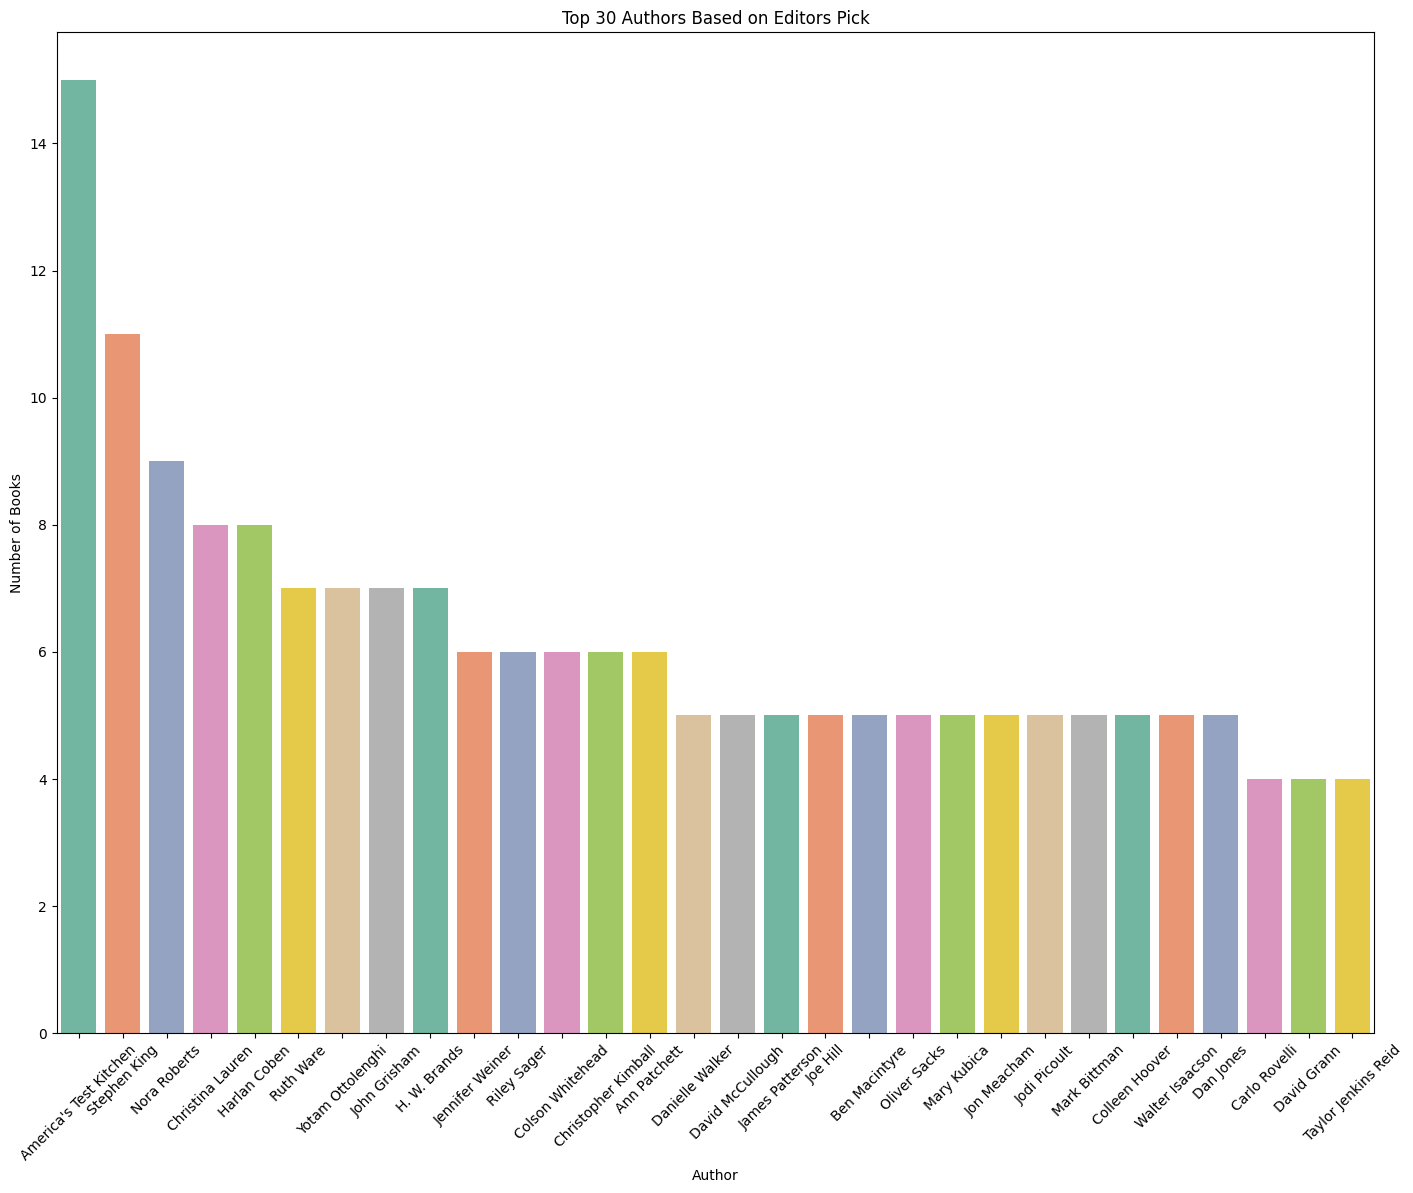

In [ ]:
plt.figure(figsize=(17, 13))
sns.barplot(x=author_editor.index, y=author_editor.values, palette="Set2")
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title("Top 30 Authors Based on Editors Pick")
plt.xticks(rotation=45)
plt.show()


**Top Authors in each category based on Editor's Pick**

In [ ]:
top_aut_cat_editor = editorpics.groupby('category')['author'].value_counts().groupby('category').head(10)
print(top_aut_cat_editor)

category             author           
Arts & Photo graphy  Robert Greenfield    2
                     Akiko Busch          1
                     Ann Wilson           1
                     Anthony M. Amore     1
                     Arthur Lubow         1
                                         ..
Travel               Peter Hessler        2
                     Rinker Buck          2
                     A.A. Gill            1
                     Andy Hall            1
                     Annie Dillard        1
Name: count, Length: 279, dtype: int64


In [ ]:
num_categories = len(top_aut_cat_editor)
cols = 3
rows = math.ceil(num_categories / cols)

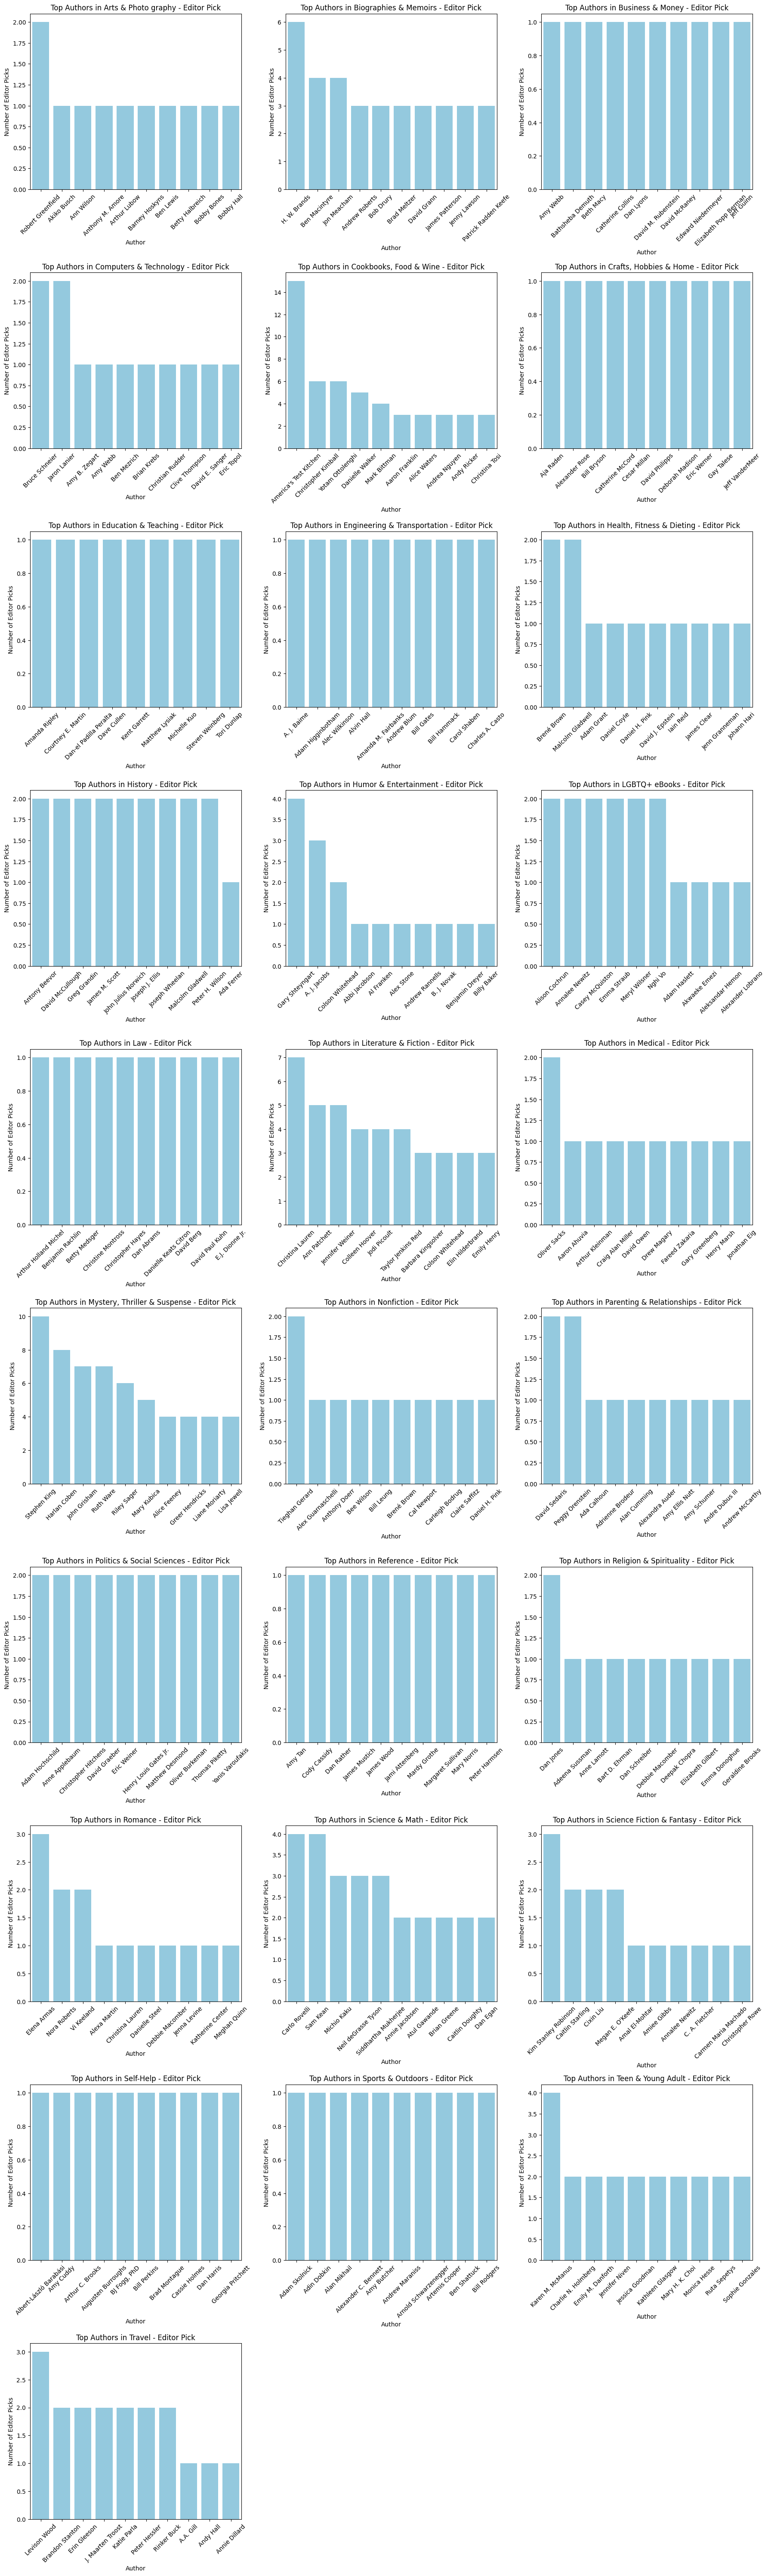

In [ ]:
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))  # Create subplots
axes = axes.flatten()  # Flatten for easy indexing


# Loop through categories and plot in the grid
for i, (category, author) in enumerate(top_aut_cat_editor.groupby(level=0)):
    sns.barplot(
        x=author.index.get_level_values(1),
        y=author.values,
        color='skyblue',
        ax=axes[i]
    )
    axes[i].set_title(f'Top Authors in {category} - Editor Pick')
    axes[i].set_xlabel('Author')
    axes[i].set_ylabel('Number of Editor Picks')
    axes[i].tick_params(axis='x', rotation=45)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# publishers

**Top 10 Publishers**

In [ ]:
top_publishers = book['soldBy'].value_counts().head(10)
print(top_publishers)

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(top_publishers, labels = None, autopct = '%1.1f%%')
plt.title('Top Publishers')
plt.legend(labels=top_publishers.index, loc='lower left', bbox_to_anchor=(0.85, 0.9))
plt.show()

**Top Publishers based on Average Star Rating**

In [ ]:
star_sell = book.groupby('soldBy')['stars'].mean().sort_values(ascending=False).head(30)
print(star_sell)

In [ ]:
plt.figure(figsize=(18, 14))
sns.barplot(y=star_sell.index, x=star_sell.values, palette="coolwarm")
plt.ylabel('Publisher')
plt.xlabel('Average Stars')
plt.title("Top 30 Publishers Based on Average Stars")
plt.xticks(rotation=45)
plt.show()

# Year

**Book Published from 1999-2023**

In [ ]:
year =book[book['year']>= 1999]
year.head(2)
year = year["year"].value_counts().sort_index(ascending=False)
print(year)

In [ ]:
plt.figure(figsize=(10,6))
year.plot(kind = "line", marker = "o")
plt.title("Number of Books Published from 1999-2023")
plt.xlabel("Year")
plt.ylabel("Number of Books Released")
plt.grid(True)
plt.tight_layout()
plt.show()

**Prices of Books from 1999-2023**

In [ ]:
year =book[book['year']>= 1999]
price_year = year.groupby('year')['price'].mean()
print(price_year)

In [ ]:
plt.figure(figsize=(10,5))
price_year.plot(kind = "line", marker = "o")
plt.title("Average Price of Books Published from 1999-2023")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.grid()
plt.tight_layout()
plt.show()

# price distribution

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(book['price'], bins=20, edgecolor="black", color='orange')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Book Prices')

# number of books for kindle, editor, bestsellers, goodreads

In [ ]:
kindle_star = book.groupby('isKindleUnlimited')['stars'].count()
print(kindle_star)

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=kindle_star.index, y=kindle_star.values, palette="coolwarm")
plt.xlabel('Kindle Unlimited')
plt.ylabel('Number of Books')
plt.title("Number of Books in Kindle Unlimited")
plt.show()

#Principal Component Analysis

In [ ]:
book1 = book[['stars', 'price', "isEditorsPick", "isKindleUnlimited", "isBestSeller", "isGoodReadsChoice"]]

In [ ]:
scale = StandardScaler()
scaled_data = scale.fit_transform(book1)

# We can change the above output into a dataset.
scaled_data = pd.DataFrame(scaled_data,columns=book1.columns)
scaled_data.head()
scaled_data.describe()

,stars,price,isEditorsPick,isKindleUnlimited,isBestSeller,isGoodReadsChoice
count,7.780000e+04,7.780000e+04,7.780000e+04,7.780000e+04,7.780000e+04,7.780000e+04
mean,-3.331697e-16,-3.507049e-17,2.922541e-17,-5.845082e-17,1.095953e-17,6.502653e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-5.281481e+00,-7.353998e-01,-2.253201e-01,-4.291509e-01,-1.284077e-01,-9.610514e-02
25%,3.461081e-02,-3.939730e-01,-2.253201e-01,-4.291509e-01,-1.284077e-01,-9.610514e-02
50%,1.554311e-01,-2.800374e-01,-2.253201e-01,-4.291509e-01,-1.284077e-01,-9.610514e-02
75%,3.970716e-01,-5.216631e-02,-2.253201e-01,-4.291509e-01,-1.284077e-01,-9.610514e-02
max,7.595324e-01,2.516595e+01,4.438130e+00,2.330183e+00,7.787694e+00,1.040527e+01


In [ ]:
# Target Variable
Y = book['reviews']
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,Y,test_size=0.3,random_state=123)

# Initialize and Fit PCA
# We first initialize PCA for having 13 components (for 13 continuous variables in the dataset)
# and then we fit this model on the scaled features.

pca = PCA(n_components=6)
pca_model = pca.fit(X_train)

In [ ]:
# Generate PCA Loadings

# We use transform command which transforms the scaled data to PCA loadings for each observation.
pca_train = pca_model.transform(X_train)

In [ ]:
var_name = ['stars', 'price', "isEditorsPick", "isKindleUnlimited", "isBestSeller", "isGoodReadsChoice"]

Matrix = pd.DataFrame(pca_model.components_,columns=var_name)
Matrix1 = np.transpose(Matrix)
Matrix1

,0,1,2,3,4,5
stars,0.183364,0.563864,0.068321,0.690169,0.159779,0.376701
price,-0.587292,-0.399427,-0.006481,0.070484,0.345411,0.609284
isEditorsPick,-0.055278,0.572371,-0.415932,-0.599592,0.299488,0.217100
isKindleUnlimited,0.630531,-0.269236,-0.031058,-0.216753,-0.300008,0.626092
isBestSeller,0.469513,-0.298632,-0.080437,0.053185,0.799763,-0.203612
isGoodReadsChoice,0.019966,0.182312,0.902694,-0.330721,0.189324,0.079294


In [ ]:
pca_model.explained_variance_

array([1.27496773, 1.09399231, 1.03002176, 0.94961188, 0.91068493,
       0.70216021])

In [ ]:
var = pca_model.explained_variance_ratio_
var

array([0.21386913, 0.18351145, 0.17278073, 0.1592924 , 0.15276261,
       0.11778368])

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

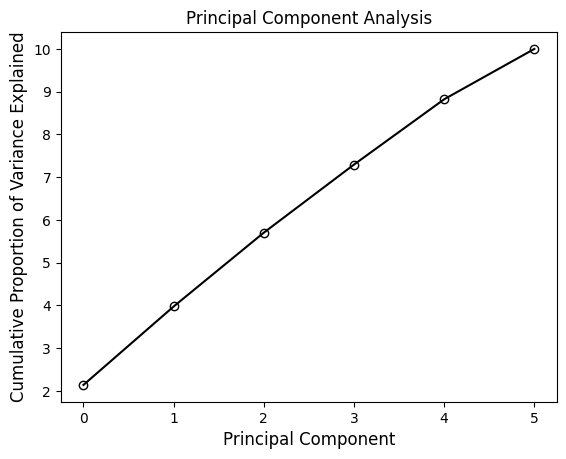

In [ ]:
cumulative_var = np.cumsum(np.round(var, decimals=4)*10)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)

In [ ]:
pca_train = pd.DataFrame(pca_train,columns=['PC_' + str(i) for i in range(1, 7)])
pca_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,-0.281442,0.042792,0.030930,0.268405,-0.074357,-0.315553
1,-0.248888,0.383286,0.079350,0.780770,0.100503,0.061654
2,-0.058698,0.300402,0.049409,0.413763,-0.140693,-0.409644
3,0.007915,0.451824,0.066164,0.577859,-0.115202,-0.341758
4,1.770366,-0.381831,-0.035307,-0.195039,-1.020988,1.225394


Text(0, 0.5, 'Cumulative Proportion')

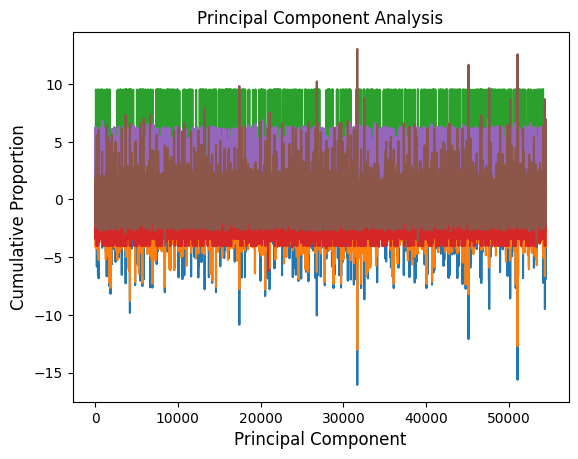

In [ ]:
plt.plot(pca_train)
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion",fontsize=12)


In [ ]:
Y_train1 = Y_train.reset_index()

pca_train1 = pd.concat([pca_train,Y_train1],axis=1)
pca_train2 = pca_train1.drop(columns='index')
pca_train3 = pca_train1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6']]
pca_train3.head()
pca_train3

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,-0.281442,0.042792,0.030930,0.268405,-0.074357,-0.315553
1,-0.248888,0.383286,0.079350,0.780770,0.100503,0.061654
2,-0.058698,0.300402,0.049409,0.413763,-0.140693,-0.409644
3,0.007915,0.451824,0.066164,0.577859,-0.115202,-0.341758
4,1.770366,-0.381831,-0.035307,-0.195039,-1.020988,1.225394
...,...,...,...,...,...,...
54455,3.671697,-2.160409,-0.603205,0.661052,6.117593,-2.172646
54456,0.007915,0.451824,0.066164,0.577859,-0.115202,-0.341758
54457,0.029918,0.572907,0.082427,0.747309,-0.063475,-0.227592
54458,-0.343744,-0.052640,0.022233,0.189837,-0.070049,-0.319415


Text(0, 0.5, 'Cumulative Proportion of Feature Extraction')

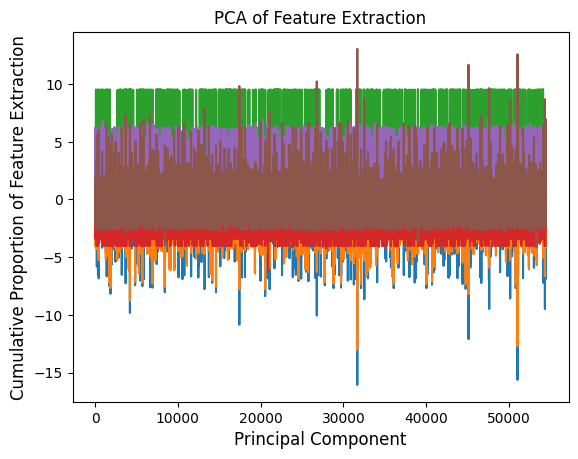

In [ ]:
plt.plot(pca_train3)
plt.title('PCA of Feature Extraction',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Feature Extraction",fontsize=12)

# statistical analysis

**Convert the categorical variable to Integer**

In [ ]:
#regression
book['isBestSeller'] = book['isBestSeller'].astype(int)
book['isEditorsPick'] = book['isEditorsPick'].astype(int)
book['isKindleUnlimited'] = book['isKindleUnlimited'].astype(int)
book['isGoodReadsChoice'] = book['isGoodReadsChoice'].astype(int)

In [ ]:
book2 = book[["stars",'price', 'reviews', "isEditorsPick", "isKindleUnlimited", "isBestSeller", "isGoodReadsChoice"]]

**Corrrelation Matrix**

In [ ]:
corr = book2.corr()
corr

,stars,price,reviews,isEditorsPick,isKindleUnlimited,isBestSeller,isGoodReadsChoice
stars,1.000000,-0.137744,0.022095,0.019980,-0.038591,0.016897,0.011872
price,-0.137744,1.000000,-0.041406,-0.059601,-0.198333,-0.052146,-0.028926
reviews,0.022095,-0.041406,1.000000,0.128157,0.018902,0.023862,0.126381
isEditorsPick,0.019980,-0.059601,0.128157,1.000000,-0.061632,-0.028933,-0.021654
isKindleUnlimited,-0.038591,-0.198333,0.018902,-0.061632,1.000000,0.145637,-0.015544
isBestSeller,0.016897,-0.052146,0.023862,-0.028933,0.145637,1.000000,-0.012341
isGoodReadsChoice,0.011872,-0.028926,0.126381,-0.021654,-0.015544,-0.012341,1.000000


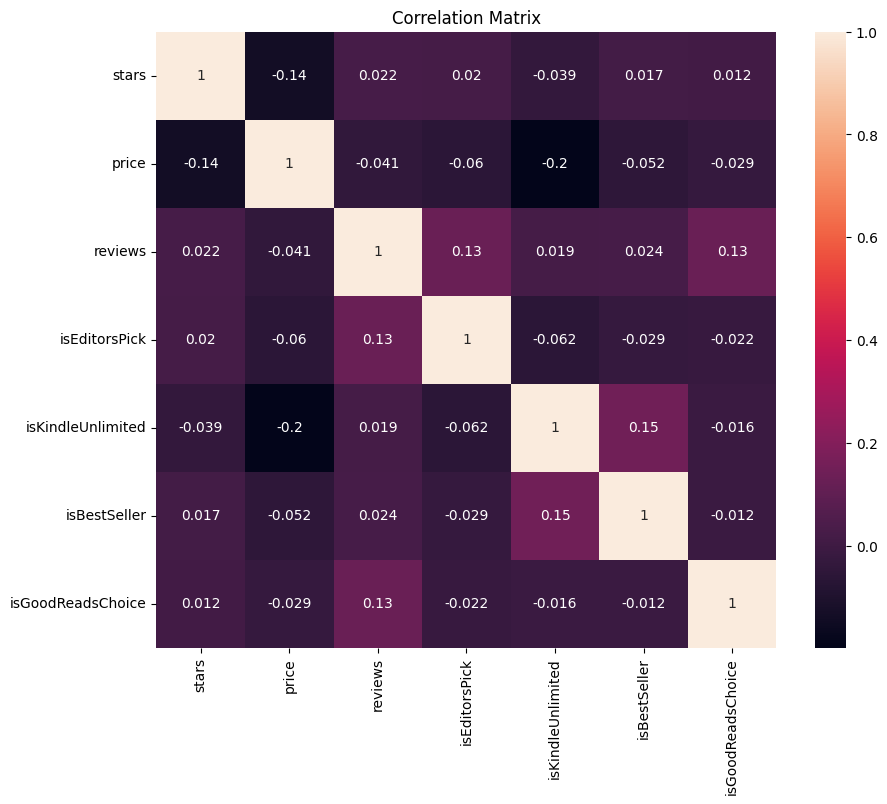

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

**Linear Regression**

In [ ]:
x = book[['price', "isEditorsPick", "isKindleUnlimited", "isBestSeller", "isGoodReadsChoice"]]
y = book['reviews']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [ ]:
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     506.2
Date:                Fri, 11 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:25:43   Log-Likelihood:            -5.3256e+05
No. Observations:               54460   AIC:                         1.065e+06
Df Residuals:                   54454   BIC:                         1.065e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               455.1039     25.89

**confusion matrix**

In [ ]:
x = book[['price', "stars", "reviews"]]
y = book['isKindleUnlimited']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression(class_weight="balanced")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[13359  6270]
 [  601  3110]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     19629
           1       0.33      0.84      0.48      3711

    accuracy                           0.71     23340
   macro avg       0.64      0.76      0.64     23340
weighted avg       0.86      0.71      0.74     23340



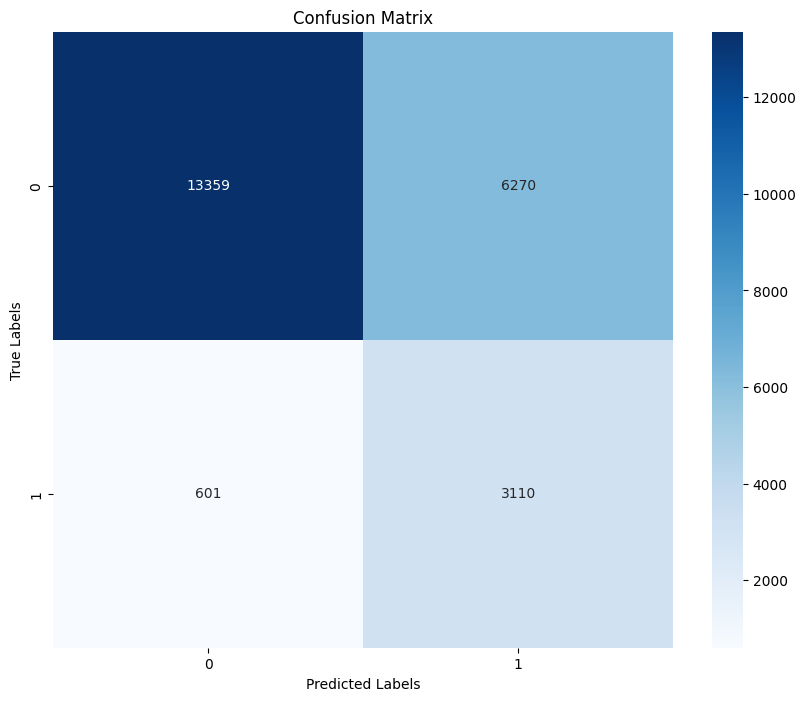

In [ ]:
plt.figure(figsize=(10, 8))
classes = [0,1]
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels = classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Recommender System

In [ ]:
book["features"] = book["title"] + " " + book["author"] + " " + book["category"]

In [ ]:
book = book.reset_index(drop=True)

book["features"] = book["title"] + " " + book["author"] + " " + book["category"]
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(book["features"])

nn_model = NearestNeighbors(metric="cosine", algorithm="brute")
nn_model.fit(tfidf_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
from IPython.core.display import display, HTML

def recommend_books(book_title, num_recommendations=5):
    if book_title not in book["title"].values:
        return display(HTML("<p style='color:red;'>Book not found in dataset.</p>"))

    # Get the index of the book
    book_idx = book.index[book["title"] == book_title][0]

    # Find similar books using Nearest Neighbors
    distances, indices = nn_model.kneighbors(tfidf_matrix[book_idx], n_neighbors=num_recommendations+1)

    # Get recommended books
    recommended_books = book.iloc[indices[0][1:]][['title', 'author', 'category', "stars", 'soldBy',
                                                   "year", "price", "imgUrl"]]

    # Generate HTML output to display images
    html_output = ""
    for _, row in recommended_books.iterrows():
        html_output += f"""
        <div style="display: flex; align-items: center; margin-bottom: 20px;">
            <img src="{row['imgUrl']}" alt="Book Cover" style="width: 120px; height: 180px; margin-right: 15px; border-radius: 5px;">
            <div>
                <h4 style="margin: 5px 0;">{row['title']}</h4>
                <p><strong>Author:</strong> {row['author']}</p>
                <p><strong>Category:</strong> {row['category']}</p>
                <p><strong>Stars:</strong> {row['stars']} ⭐</p>
                <p><strong>Sold By:</strong> {row['soldBy']}</p>
                <p><strong>Year:</strong> {row['year']}</p>
                <p><strong>Price:</strong> ${row['price']}</p>
            </div>
        </div>
        <hr>
        """

    display(HTML(html_output))


# Recommend books similar to purple hibiscus

In [ ]:
recommend_books("Purple Hibiscus: A Novel")

# Get Author Books

# CODE

In [ ]:
def get_books_by_author(author_name):
    author_books = book[book["author"].str.contains(author_name, case=False, na=False)]

    if author_books.empty:
        return display(HTML(f"<p style='color:red;'>No books found for author: {author_name}</p>"))

    # Generate HTML output with images
    html_output = ""
    for _, row in author_books.iterrows():
        html_output += f"""
        <div style="display: flex; align-items: center; margin-bottom: 20px;">
            <img src="{row['imgUrl']}" alt="Book Cover" style="width: 120px; height: 180px; margin-right: 15px; border-radius: 5px;">
            <div>
                <h4 style="margin: 5px 0;">{row['title']}</h4>
                <p><strong>Author:</strong> {row['author']}</p>
                <p><strong>Category:</strong> {row['category']}</p>
                <p><strong>Rating:</strong> {row['stars']} ⭐</p>
                <p><strong>Price:</strong> ${row['price']}</p>
            </div>
        </div>
        <hr>
        """

    display(HTML(html_output))



# Output

In [ ]:
get_books_by_author("Fredrik Backman")
